In [1]:
#! pip install numpy pandas matplotlib sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
y_train = pd.read_csv("Y_train.csv")
# index_train = y_train.index.tolist()
y_valid = pd.read_csv("Y_valid.csv")
# index_valid = y_valid.index
y_train.info()
X_train = pd.read_csv("aggregate_train.csv") # index_col = [0]
X_valid = pd.read_csv("aggregate_valid.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mort_icu  16760 non-null  int64
dtypes: int64(1)
memory usage: 131.1 KB


In [2]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


({'n_estimators': 80}, 0.888865038129832)

In [3]:
param_test2 = {'max_depth':range(0,17,4)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=80,learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


({'max_depth': 12}, 0.8903410994265746)

In [4]:
param_test3 = {'min_samples_split':range(100,1600,200),'min_samples_leaf':range(10,100,20)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=12,n_estimators=80,learning_rate=0.1,max_features='sqrt',subsample=0.8,random_state=10),
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


({'min_samples_leaf': 70, 'min_samples_split': 1100}, 0.8919409102553155)

In [5]:
param_test4 = {'subsample':[0.8,1]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_leaf=70,min_samples_split=1100,max_depth=12,n_estimators=80,learning_rate=0.1,max_features='sqrt',random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


({'subsample': 0.8}, 0.8919409102553155)

In [6]:
param_test5 = {'n_estimators':[160,200,230,240,260,280,300],'learning_rate':[0.01,0.03,0.05,0.04,0.1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_leaf=70,min_samples_split=1100,max_depth=12,n_estimators=80,learning_rate=0.1,max_features='sqrt',random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


({'learning_rate': 0.05, 'n_estimators': 230}, 0.8955835079445361)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

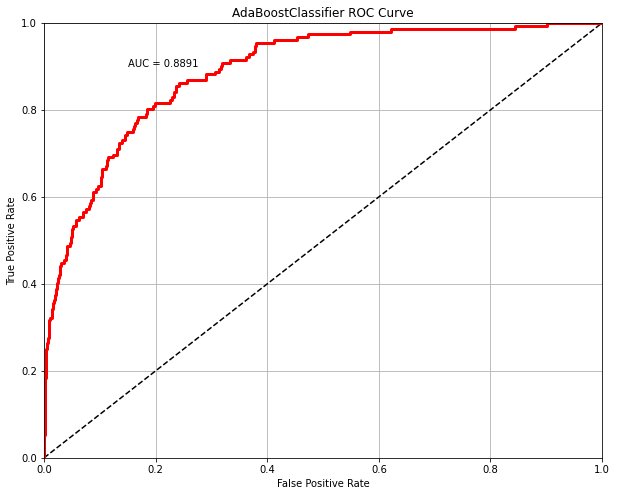

In [7]:
gbc=GradientBoostingClassifier(n_estimators=240,learning_rate=0.05,min_samples_leaf=70,min_samples_split=1100,max_depth=12,max_features='sqrt',random_state=10)
gbc.fit(X_train,y_train)
y_valid_scores = gbc.predict_proba(X_valid)[:, 1]
fpr, tpr, threshold = roc_curve(y_valid, y_valid_scores)
auc_valid = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, "r", linewidth=3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoostClassifier ROC Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.15, 0.9, "AUC = " + str (round (auc_valid, 4)))
plt.show